In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
data = pd.read_excel('H:\DATA\MY\practice\Practice-33\Dry_Bean_Dataset.xlsx')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
data = data.round(2)
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.29,208.18,173.89,1.20,0.55,28715,190.14,0.76,0.99,0.96,0.91,0.01,0.0,0.83,1.00,SEKER
1,28734,638.02,200.52,182.73,1.10,0.41,29172,191.27,0.78,0.98,0.89,0.95,0.01,0.0,0.91,1.00,SEKER
2,29380,624.11,212.83,175.93,1.21,0.56,29690,193.41,0.78,0.99,0.95,0.91,0.01,0.0,0.83,1.00,SEKER
3,30008,645.88,210.56,182.52,1.15,0.50,30724,195.47,0.78,0.98,0.90,0.93,0.01,0.0,0.86,0.99,SEKER
4,30140,620.13,201.85,190.28,1.06,0.33,30417,195.90,0.77,0.99,0.98,0.97,0.01,0.0,0.94,1.00,SEKER


In [5]:
print(data.shape)

(13611, 17)


In [6]:
print(data.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


C:\Users\mouncef\AppData\Local\Temp\ipykernel_16072\726507945.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

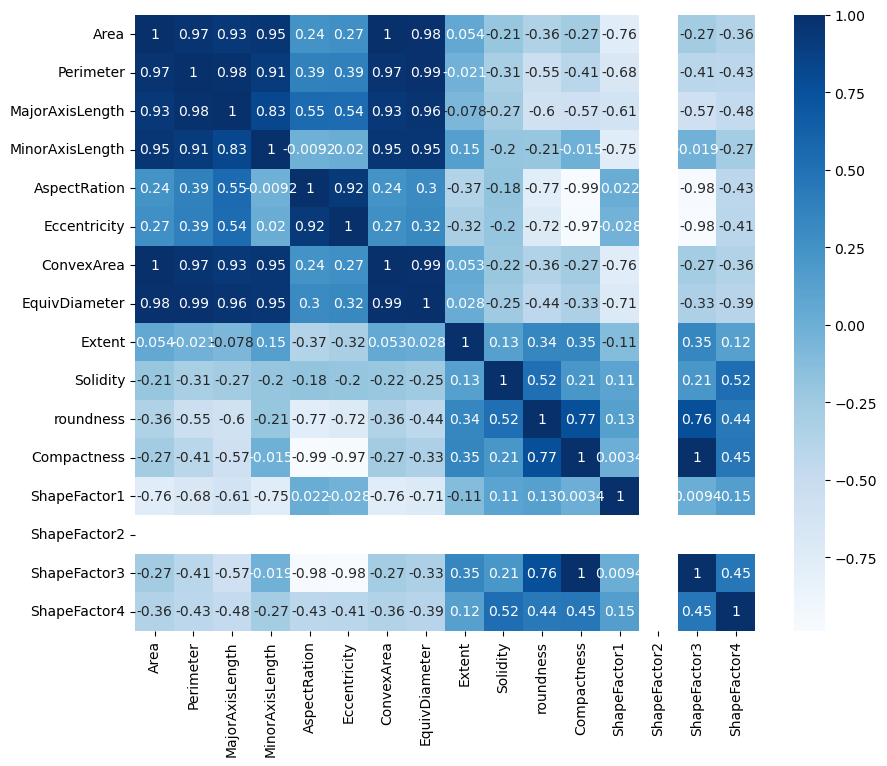

In [7]:
corr_matrix = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot = True, cmap= 'Blues')

In [8]:
print(Counter(data['Class']))

Counter({'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2027, 'HOROZ': 1928, 'CALI': 1630, 'BARBUNYA': 1322, 'BOMBAY': 522})


In [9]:
model = RandomForestClassifier(random_state= 42)

X = data.drop('Class', axis = 1)
Y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

report = classification_report(y_test, y_pred)

print('the accuracy score for the training data : ', accuracy_train)
print('the accuracy score for the testing data : ', accuracy)
print(report)

the accuracy score for the training data :  1.0
the accuracy score for the testing data :  0.9144326110907087
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.90       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.93      0.93       317
    DERMASON       0.89      0.91      0.90       671
       HOROZ       0.97      0.96      0.96       408
       SEKER       0.95      0.92      0.93       413
        SIRA       0.86      0.86      0.86       536

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.93      2723
weighted avg       0.91      0.91      0.91      2723



In [10]:
cv_score = cross_val_score(model, X, Y, scoring= 'accuracy')

print('the cross validation score : ', cv_score)
print('the mean cross validation score : ',cv_score.mean())

the cross validation score :  [0.39735586 0.71454813 0.68699486 0.54665687 0.286554  ]
the mean cross validation score :  0.5264219429935701


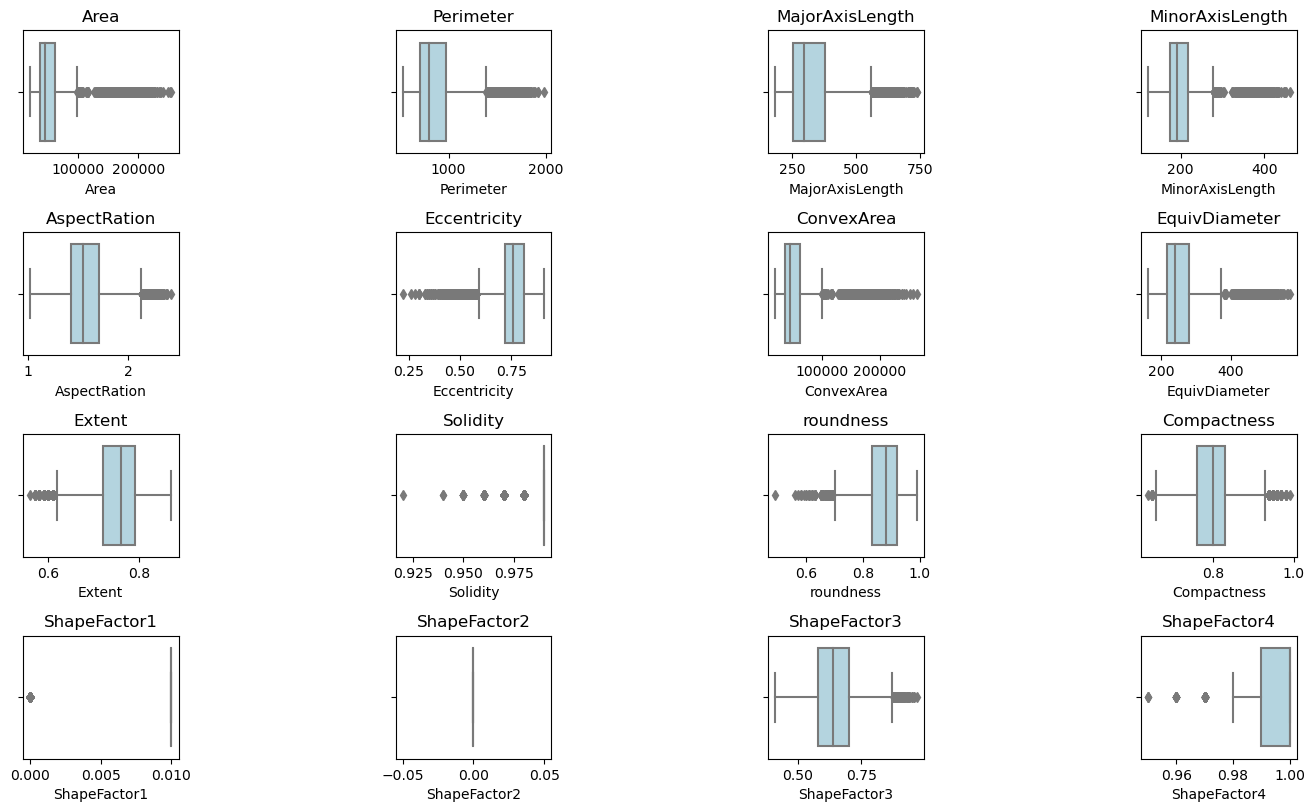

In [11]:
numeric_data = data.select_dtypes(include='number').columns

plt.figure(figsize=(15, len(numeric_data) * 2))
for i, column in enumerate(numeric_data):
    plt.subplot(len(numeric_data), 8, 2*i + 1)
    sns.boxplot(data=data, x=column, color='lightblue')
    plt.title(column)
# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
for column in data:
  if data[column].dtype != object:  # Check if the column is numeric
    Q1 = data[column].quantile(0.2)  # 25th percentile
    Q3 = data[column].quantile(0.8)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define the bounds for outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Filter data to remove outliers
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

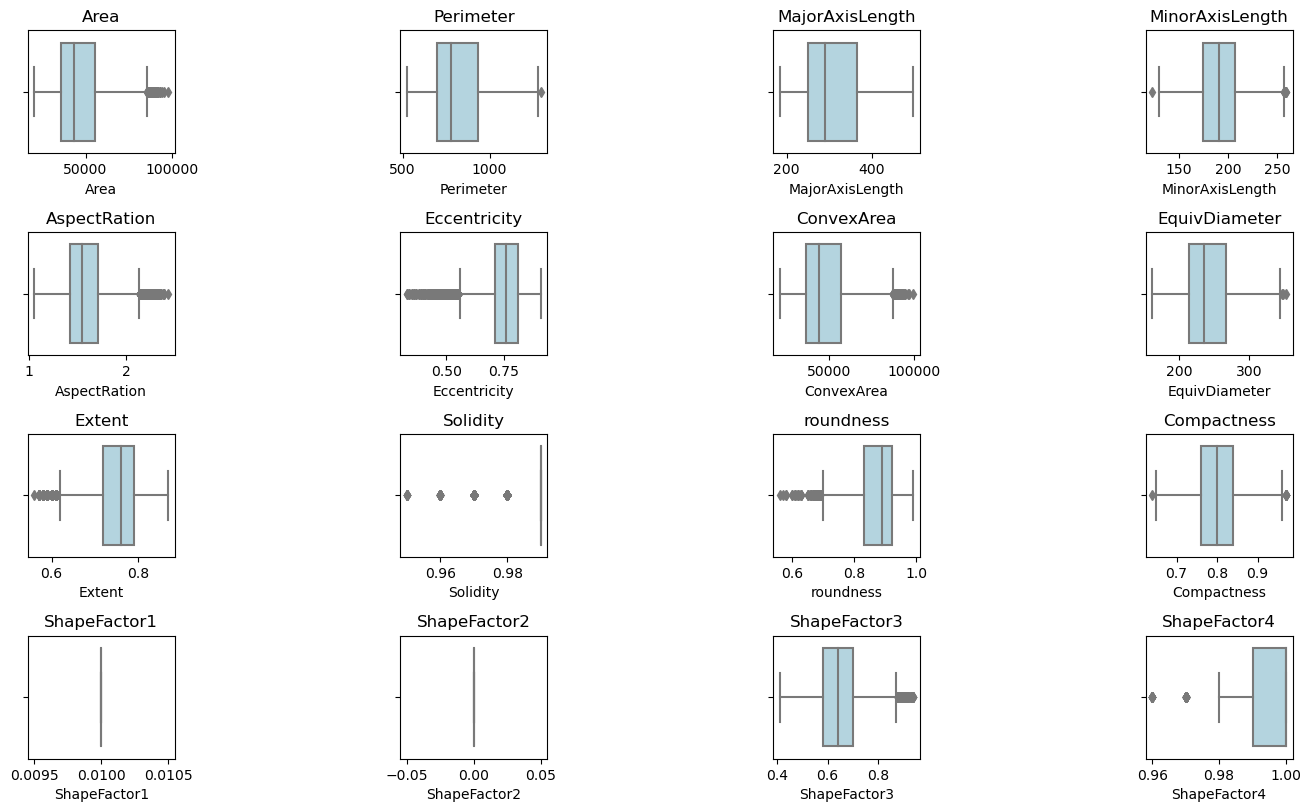

In [13]:
numeric_data = data.select_dtypes(include='number').columns

plt.figure(figsize=(15, len(numeric_data) * 2))
for i, column in enumerate(numeric_data):
    plt.subplot(len(numeric_data), 8, 2*i + 1)
    sns.boxplot(data=data, x=column, color='lightblue')
    plt.title(column)
# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
data.shape

(12659, 17)

In [15]:
X = data.drop('Class', axis = 1)
Y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

report = classification_report(y_test, y_pred)

print('the accuracy score for the training data : ', accuracy_train)
print('the accuracy score for the testing data : ', accuracy)
print(report)

the accuracy score for the training data :  1.0
the accuracy score for the testing data :  0.9052132701421801
              precision    recall  f1-score   support

    BARBUNYA       0.90      0.89      0.89       222
        CALI       0.93      0.89      0.91       303
    DERMASON       0.90      0.92      0.91       688
       HOROZ       0.95      0.94      0.95       376
       SEKER       0.95      0.94      0.94       405
        SIRA       0.84      0.85      0.85       538

    accuracy                           0.91      2532
   macro avg       0.91      0.90      0.91      2532
weighted avg       0.91      0.91      0.91      2532



In [16]:
cv_score = cross_val_score(model, X, Y, scoring= 'accuracy')

print('the cross validation score : ', cv_score)
print('the mean cross validation score : ', cv_score.mean())

the cross validation score :  [0.37954186 0.69944708 0.66627172 0.49249605 0.21493481]
the mean cross validation score :  0.49053830448723346


In [19]:
# even after removing the outliers the model still not performing very well
# let's try to remove unnecessary features

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=0.95)

X = scaler.fit_transform(X)

X_pca = pca.fit_transform(X)
X = pd.DataFrame(X_pca)

X.head()



,0,1,2,3,4
0,-0.283704,0.552502,-1.645300,-0.730749,-0.141561
1,1.919721,1.482276,-1.574299,-2.280006,0.420833
2,-0.083155,0.652724,-1.572666,-0.478040,0.182643
3,0.068958,1.107281,-1.158961,-2.710351,1.424370
4,-0.552985,1.806062,-2.035890,-1.299133,-0.477749


In [20]:
model = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state= 42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('the accuracy score for the testing data : ', accuracy)
print(report)

the accuracy score for the testing data :  0.9032385466034755
              precision    recall  f1-score   support

    BARBUNYA       0.90      0.85      0.88       222
        CALI       0.90      0.90      0.90       303
    DERMASON       0.90      0.92      0.91       688
       HOROZ       0.95      0.95      0.95       376
       SEKER       0.96      0.92      0.94       405
        SIRA       0.84      0.85      0.85       538

    accuracy                           0.90      2532
   macro avg       0.91      0.90      0.90      2532
weighted avg       0.90      0.90      0.90      2532



In [23]:
cv_score = cross_val_score(model, X, Y, scoring= 'accuracy')

print('the cross validation score : ', cv_score)
print('the mean cross validation score : ', cv_score.mean())

the cross validation score :  [0.65797788 0.92851501 0.96129542 0.93601896 0.59344133]
the mean cross validation score :  0.815449718904229


In [30]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Fit the model
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred = xgb_model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.36%


In [40]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(xgb_model, X, Y, cv=skf)

print('the cross validation score : ', cv_score)
print('the mean cross validation score : ', cv_score.mean())

the cross validation score :  [0.65205371 0.93759874 0.95616114 0.91311216 0.58277361]
the mean cross validation score :  0.8083398715329595


In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 50]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, Y)

print("Best parameters: ", grid_search.best_params_)
print('the score rate : ', grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
the score rate :  0.8386768993391893


In [35]:
y_pred = grid_search.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)

print('the accuracy score : ',accuracy)

the accuracy score :  0.9158767772511849
